# CNN-Based CPAP Embeddings, t-SNE Visualization, and Cluster Optimization

This notebook demonstrates the process of extracting features from CPAP images using a pre-trained ResNet50 model. The extracted features are then visualized using t-SNE, allowing us to observe the underlying structure and relationships between the images.

Additionally, the notebook implements a K-means clustering algorithm, optimizing the number of clusters (k) based on various metrics, including inertia, silhouette score, and average pairwise distance within clusters. The goal is to determine the optimal cluster size that balances all factors for the given dataset.

### Steps:
1. **Feature Extraction**: Using ResNet50 to extract embeddings from the CPAP images.
2. **t-SNE Visualization**: Projecting the extracted embeddings onto a 2D space for visual exploration.
3. **K-means Clustering**: Applying K-means clustering for a range of k values and optimizing the number of clusters based on inertia, silhouette score, and average pairwise distance.
4. **Optimal Cluster Analysis**: Identifying the optimal k value based on a combined score that considers multiple factors.

This analysis helps us understand the data distribution and find an appropriate clustering structure for further analysis.


### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from PIL import Image

### Mounting content from google drive

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Feature Extraction with ResNet50


In [6]:
# Set the path to your image directory
folder_path = '/content/drive/My Drive/rutgers/CPAPPatients/'

# Initialize the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
##consider changing to 224 target size, it will prob perform better, so compare
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [7]:

# Extract features from all images
image_data = []
image_paths = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(folder_path, filename)
        features = extract_features(img_path)
        image_data.append(features)
        image_paths.append(img_path)

# Convert to numpy array
image_data = np.array(image_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━

### Feature Visualization with ResNet50

Visualizing features for figure1029.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


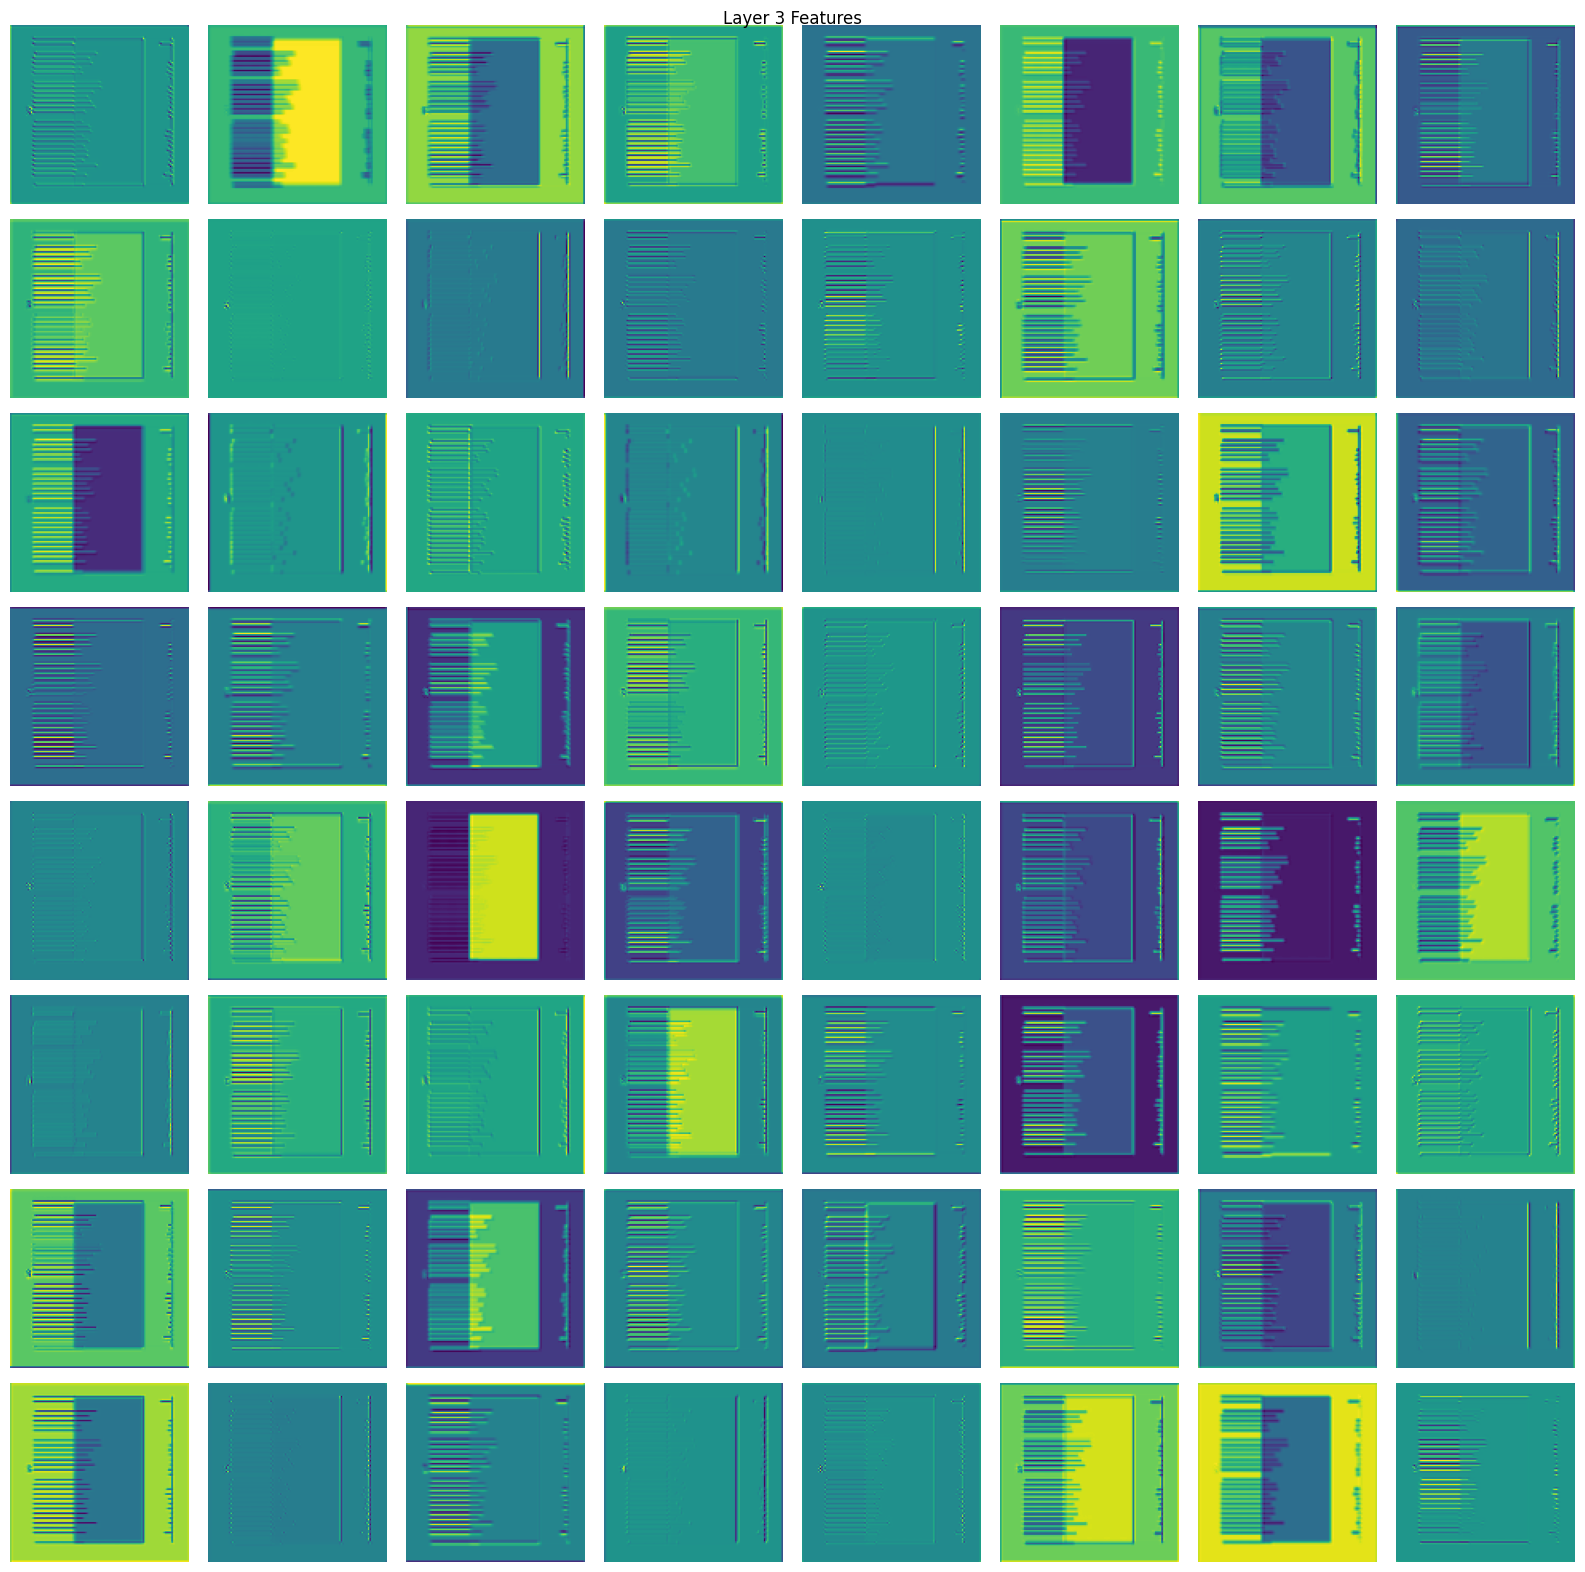

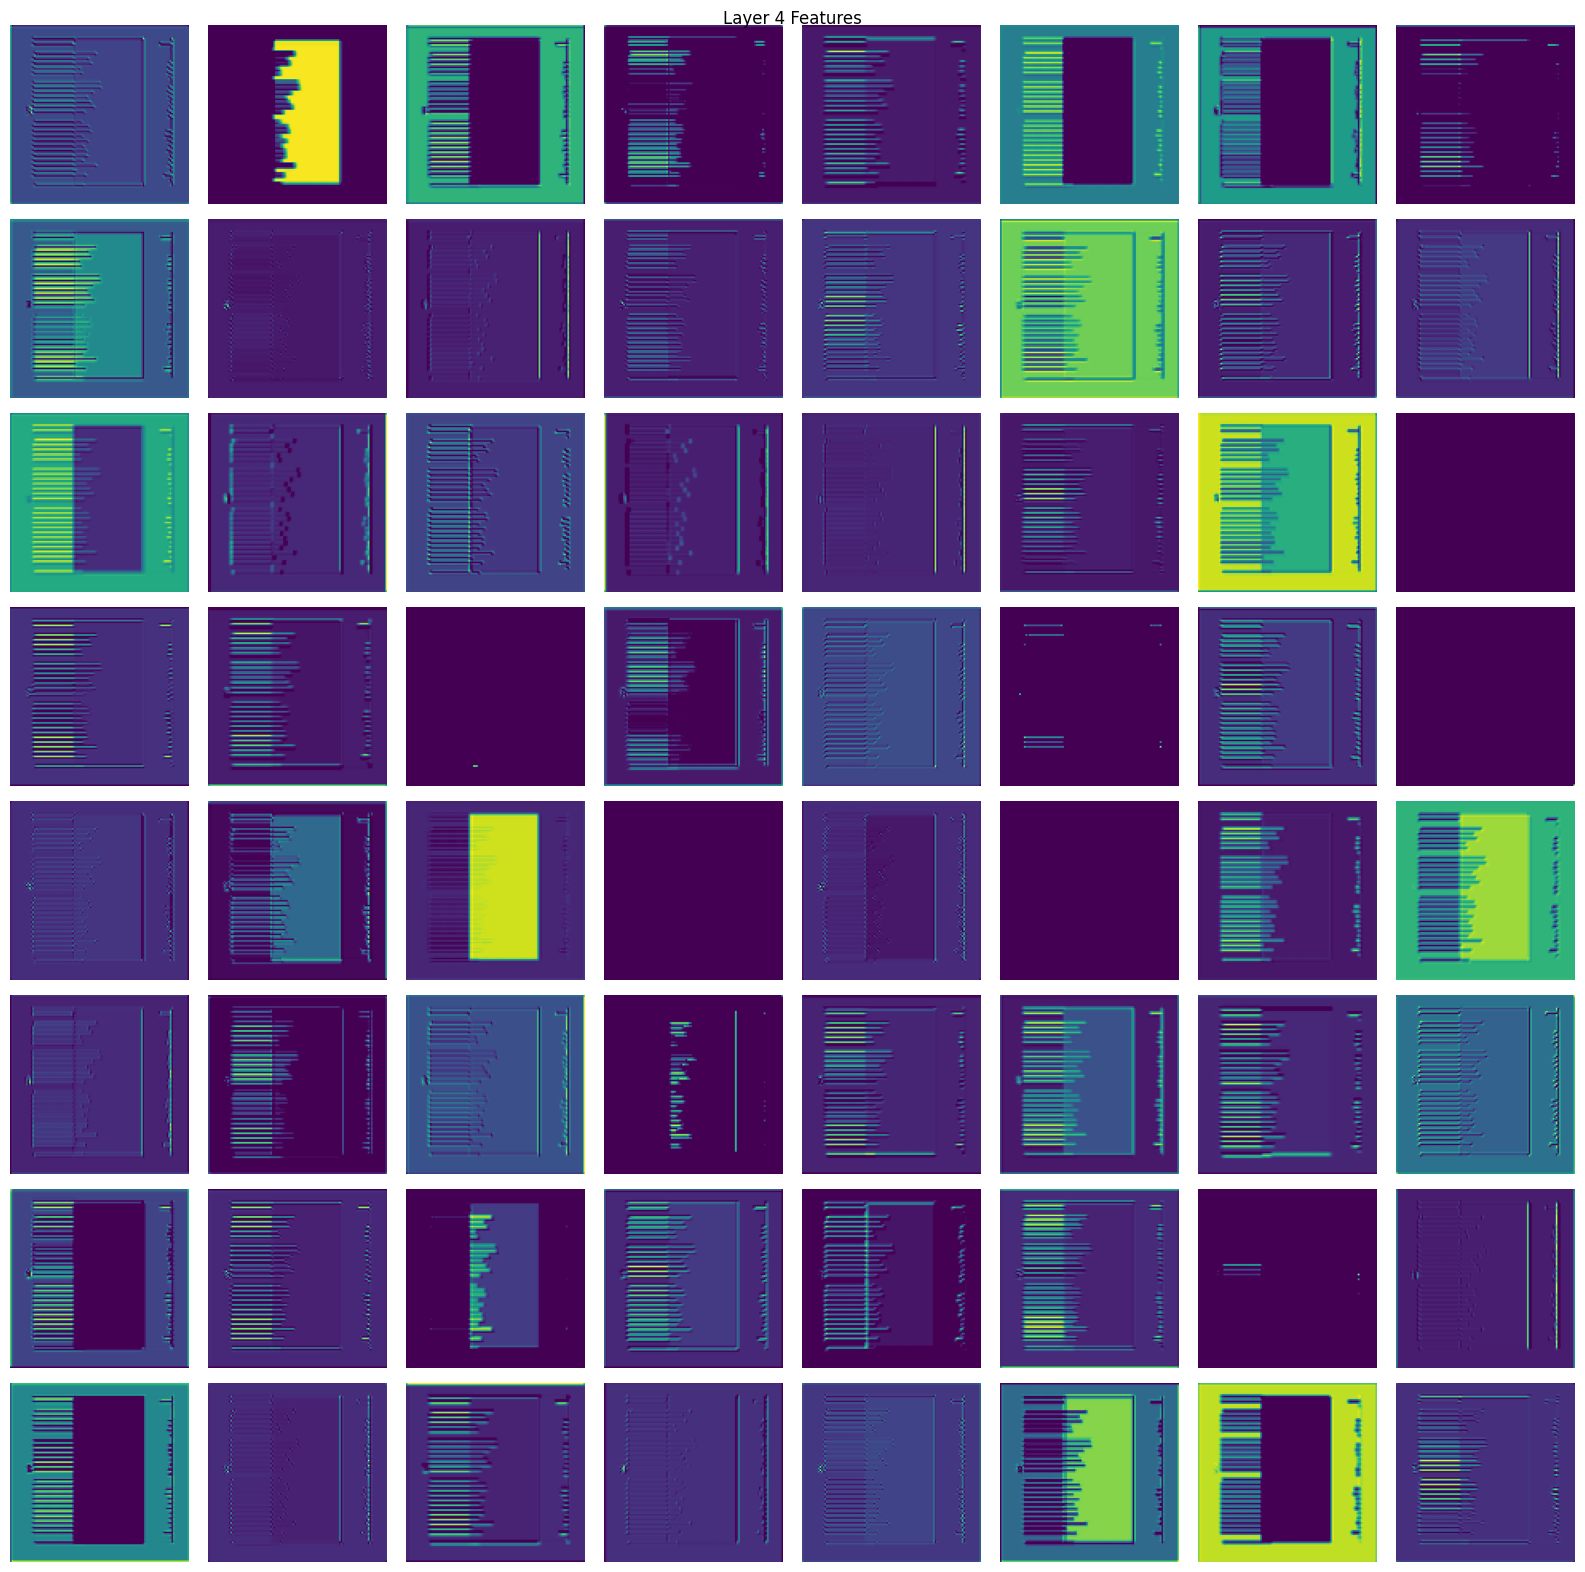

Exception ignored in: <function _xla_gc_callback at 0x7df64636a9e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Set the path to your image directory
folder_path = '/content/drive/My Drive/rutgers/CPAPPatients/'

# Initialize the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Get the output of each layer
layer_outputs = [layer.output for layer in base_model.layers if 'conv' in layer.name.lower()]
visualization_model = Model(inputs=base_model.input, outputs=layer_outputs)

def visualize_features(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get feature maps for all layers
    feature_maps = visualization_model.predict(x)

    # Plot feature maps
    for i, fmap in enumerate(feature_maps):
        # Get number of features in this layer
        n_features = fmap.shape[-1]

        # Calculate grid size
        size = int(np.ceil(np.sqrt(n_features)))

        # Plot up to 64 features
        n_cols = min(size, 8)
        n_rows = min((n_features + n_cols - 1) // n_cols, 8)

        fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
        fig.suptitle(f'Layer {i+1} Features')

        for j in range(n_rows * n_cols):
            if j < n_features:
                ax_ij = ax[j//n_cols][j%n_cols]
                ax_ij.imshow(fmap[0, :, :, j], cmap='viridis')
                ax_ij.axis('off')
            else:
                ax[j//n_cols][j%n_cols].axis('off')

        plt.tight_layout()
        plt.show()

# Select a few random images from your dataset
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
selected_images = np.random.choice(image_files, min(5, len(image_files)), replace=False)

# Visualize features for selected images
for img_file in selected_images:
    img_path = os.path.join(folder_path, img_file)
    print(f"Visualizing features for {img_file}")
    visualize_features(img_path)

### t-SNE Visualization with ResNet50 Features

## final t-SNE Visualization with ResNet50 Features -- embeddings

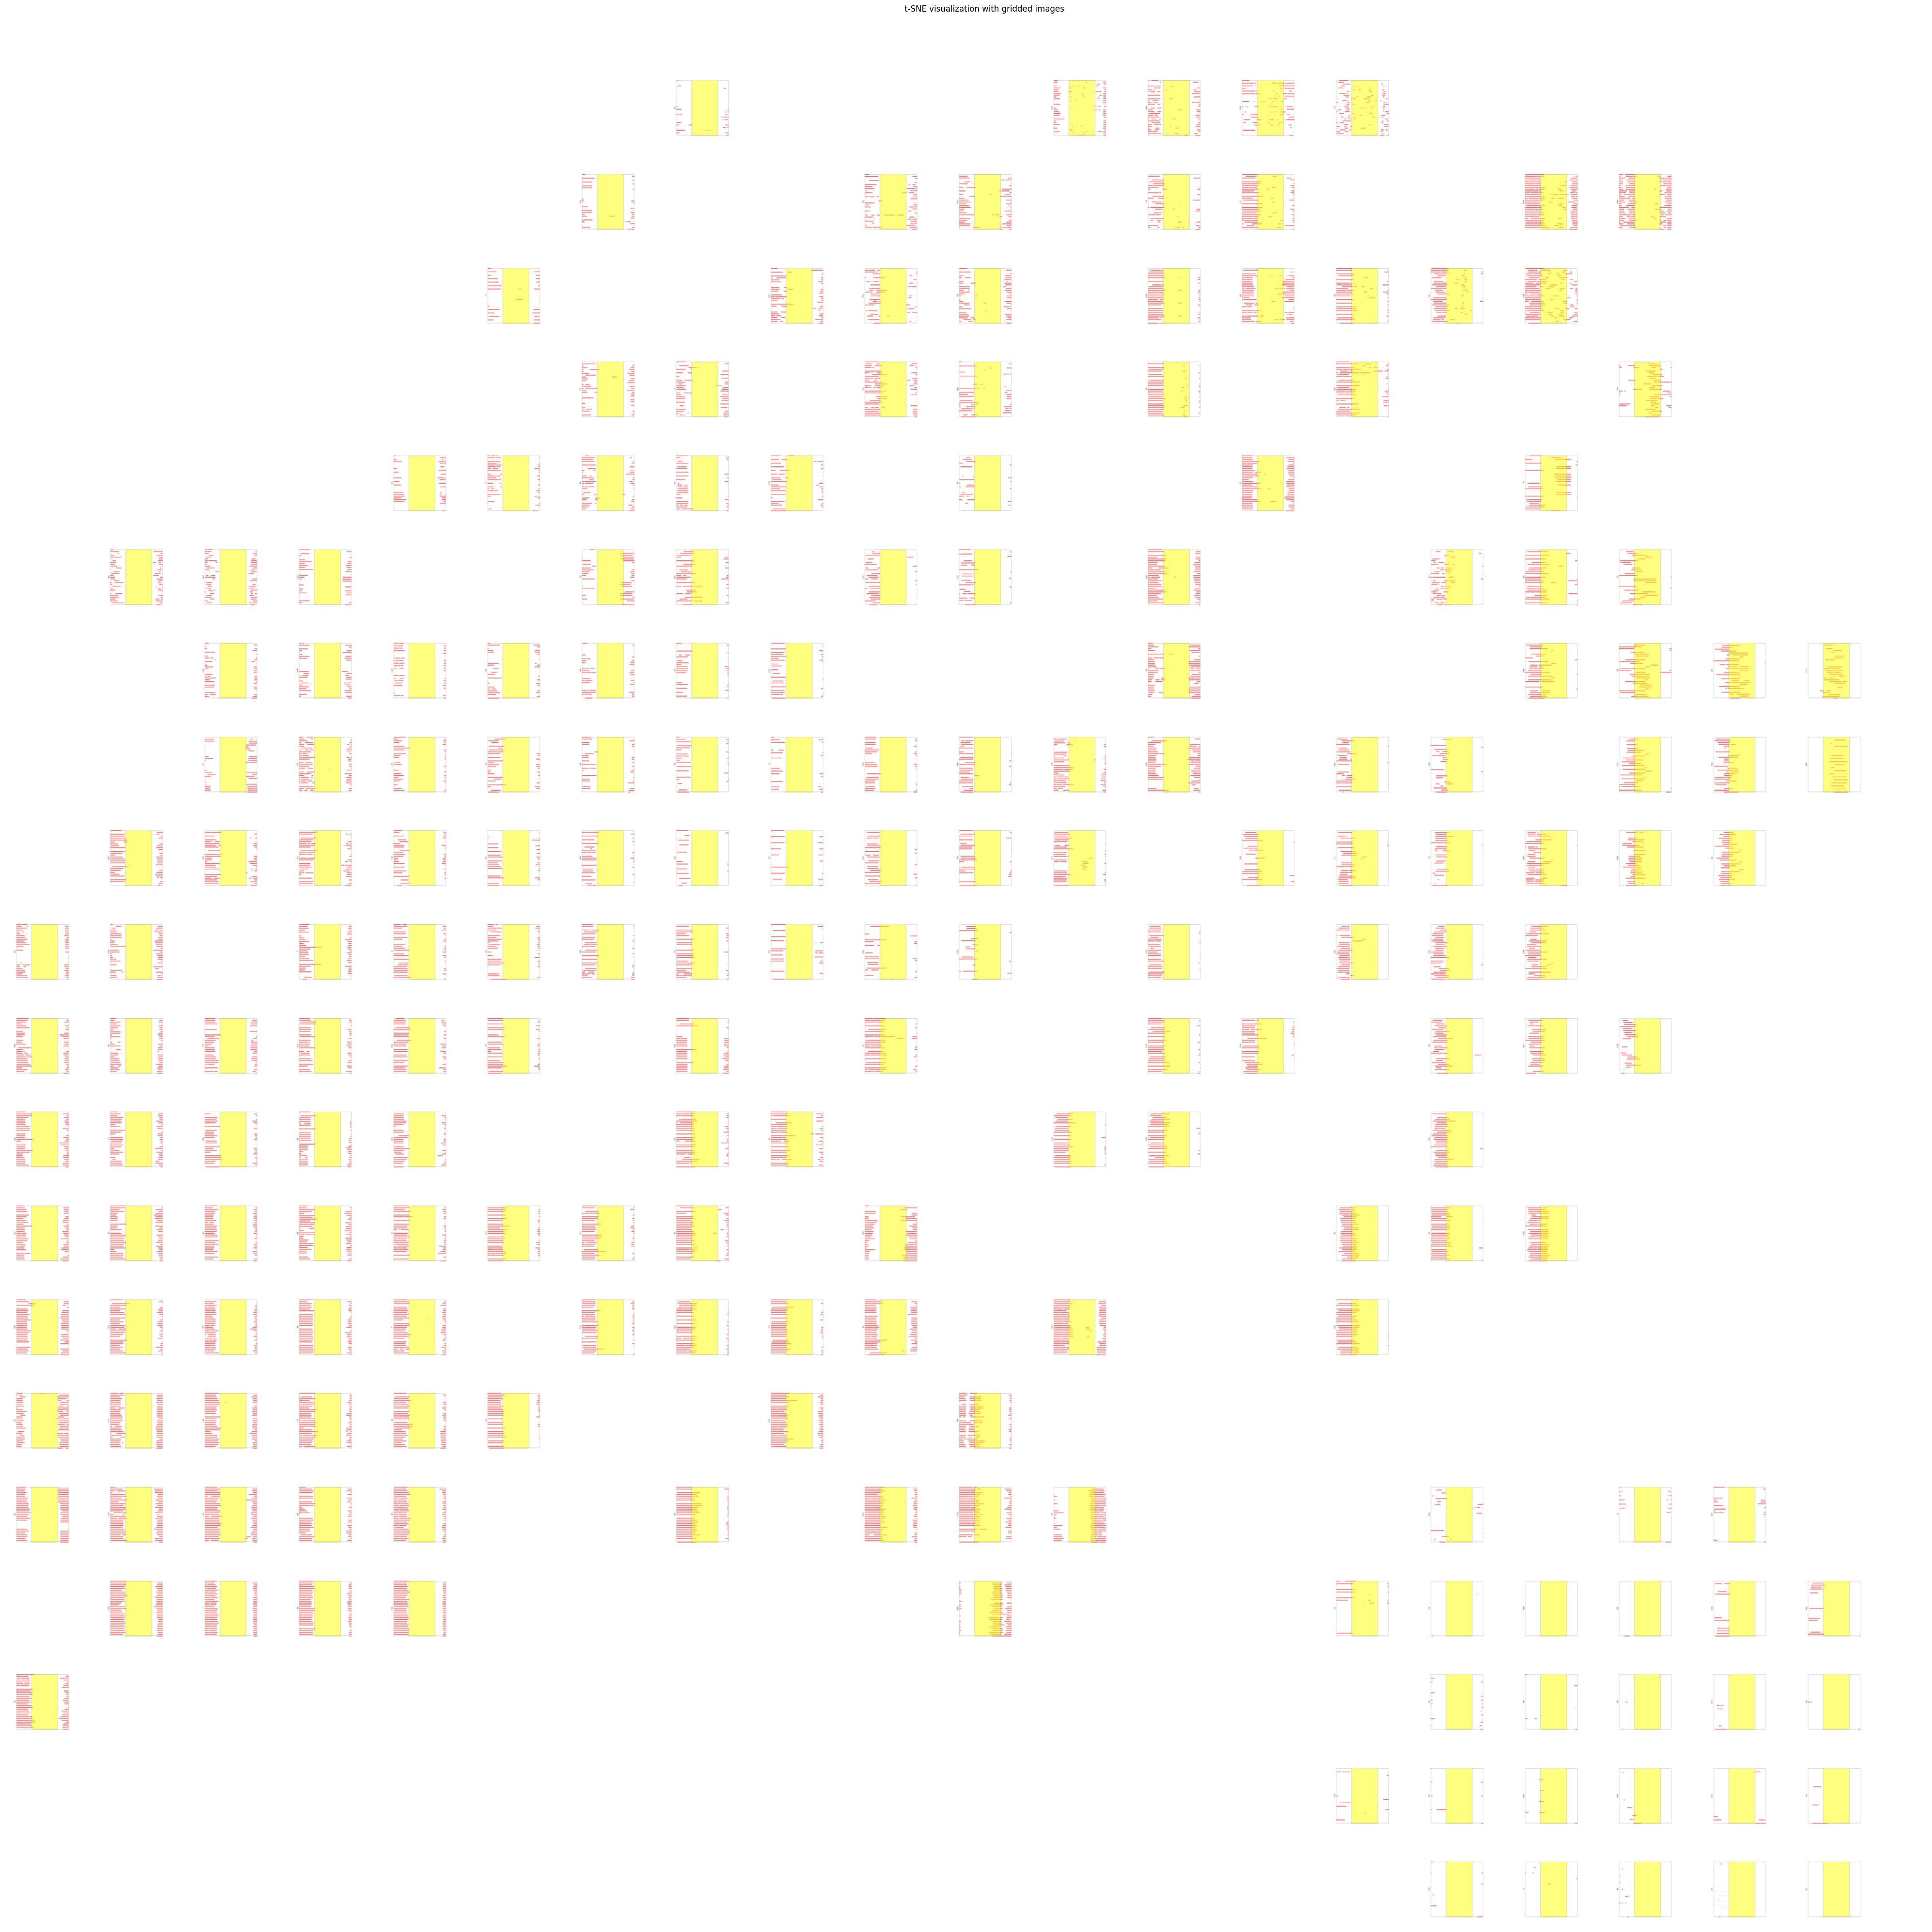

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import offsetbox


# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(image_data)

def plot_images_on_tsne(tsne_results, image_paths, grid_size=50, plot_size=0.08, max_images=None):
    if max_images is None:
        max_images = len(image_paths)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(40, 40))

    # Normalize the t-SNE results to [0, 1] range
    x_min, x_max = tsne_results[:, 0].min(), tsne_results[:, 0].max()
    y_min, y_max = tsne_results[:, 1].min(), tsne_results[:, 1].max()
    tsne_normalized = (tsne_results - [x_min, y_min]) / [x_max - x_min, y_max - y_min]

    # Create a grid
    grid = np.zeros((grid_size, grid_size), dtype=bool)

    # Function to find the nearest available grid position
    def find_nearest_available(x, y):
        i, j = int(y * grid_size), int(x * grid_size)
        for r in range(grid_size):
            for di in range(-r, r+1):
                for dj in range(-r, r+1):
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and not grid[ni, nj]:
                        return ni / grid_size, nj / grid_size
        return None

    for i, (x, y) in enumerate(tsne_normalized):
        if i >= max_images:
            break

        # Find the nearest available grid position
        pos = find_nearest_available(x, y)
        if pos is None:
            print(f"No available position for image {i}")
            continue

        y, x = pos
        grid[int(y * grid_size), int(x * grid_size)] = True

        try:
            img = Image.open(image_paths[i])
            img = img.resize((int(fig.dpi * plot_size), int(fig.dpi * plot_size)))

            im = offsetbox.OffsetImage(img, zoom=1)
            ab = offsetbox.AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        except Exception as e:
            print(f"Error processing image {i}: {e}")

    plt.title('t-SNE visualization with gridded images')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot images on t-SNE coordinates
plot_images_on_tsne(tsne_results, image_paths, grid_size=20, plot_size=1, max_images=None)

### finding optimal cluster size approach

In [ ]:
# Perform clustering
n_clusters = 20  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_data)

# Create a DataFrame with results
df = pd.DataFrame({
    'photo_name': [os.path.basename(path) for path in image_paths],
    'cluster': cluster_labels
})

print(len(df))
print(df)

# Optional: Visualize some images from each cluster
def show_images_from_cluster(cluster_num, num_images=10)
:
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Cluster {cluster_num}')
    plt.show()

# Uncomment the following lines to visualize images from each cluster
# import matplotlib.pyplot as plt
# for i in range(n_clusters):
#     show_images_from_cluster(i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


200
         photo_name  cluster
0    figure1057.jpg       13
1    figure1064.jpg       18
2    figure1089.jpg       19
3    figure1055.jpg       11
4    figure1112.jpg       13
..              ...      ...
195  figure1011.jpg       12
196  figure1068.jpg        3
197  figure1017.jpg        3
198  figure1046.jpg        8
199  figure1136.jpg       10

[200 rows x 2 columns]


In [ ]:
# Perform clustering
n_clusters = 10  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_data)

# Create a DataFrame with results
df = pd.DataFrame({
    'photo_name': [os.path.basename(path) for path in image_paths],
    'cluster': cluster_labels
})

print(len(df))
print(df)

# Optional: Visualize some images from each cluster
def show_images_from_cluster(cluster_num, num_images=10):
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Cluster {cluster_num}')
    plt.show()

# Uncomment the following lines to visualize images from each cluster
# import matplotlib.pyplot as plt
# for i in range(n_clusters):
#     show_images_from_cluster(i)

IndentationError: expected an indented block after function definition on line 16 (<ipython-input-31-16834e26940e>, line 17)

In [ ]:
# Optional: Visualize some images from each cluster
def show_images_from_cluster(cluster_num, num_images=15):
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Cluster {cluster_num}')
    plt.show()


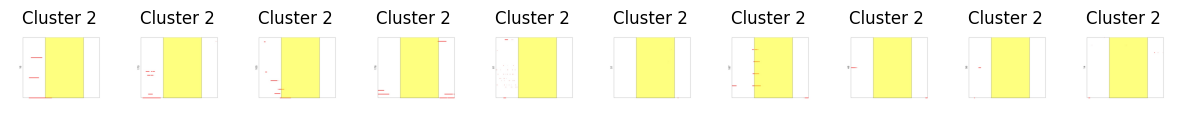

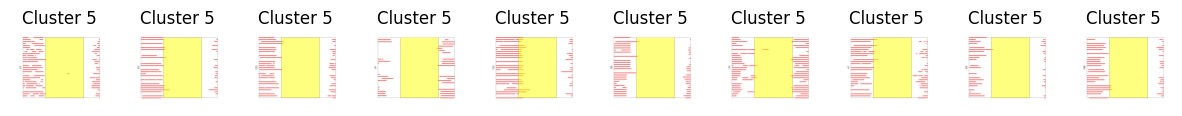

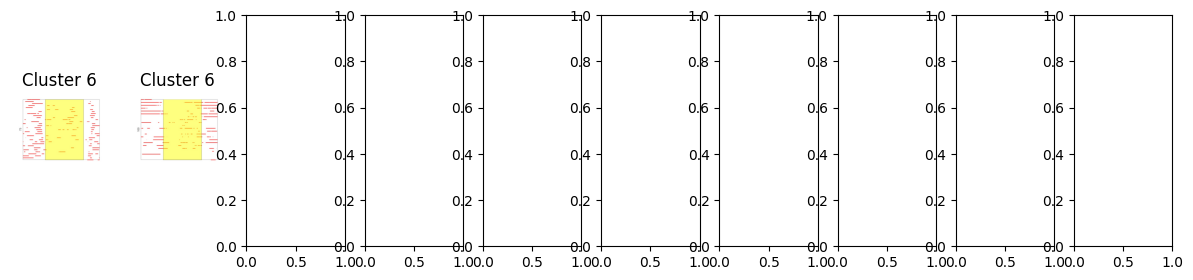

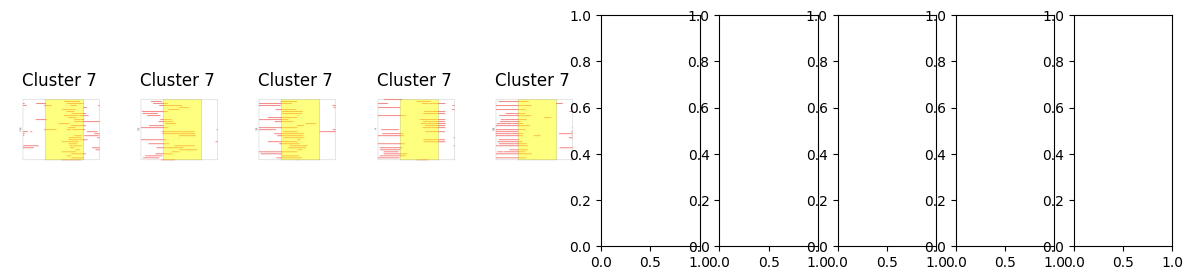

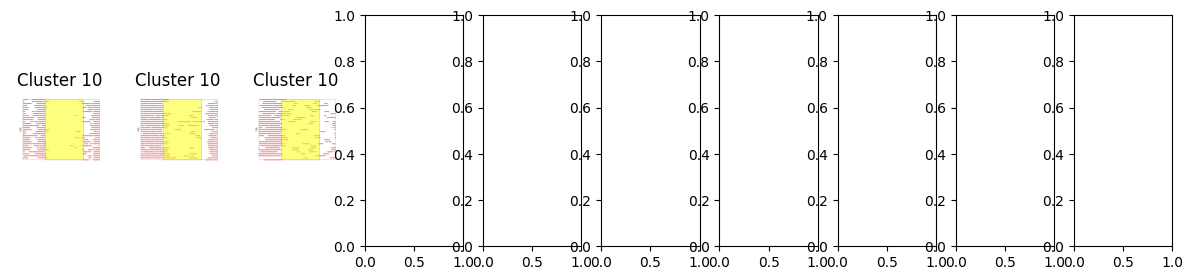

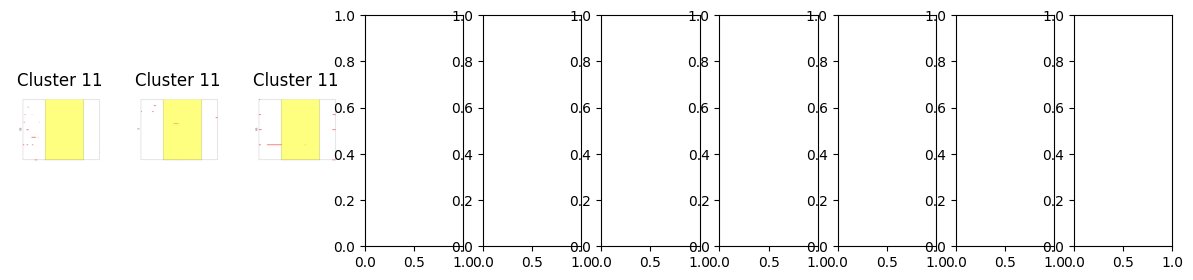

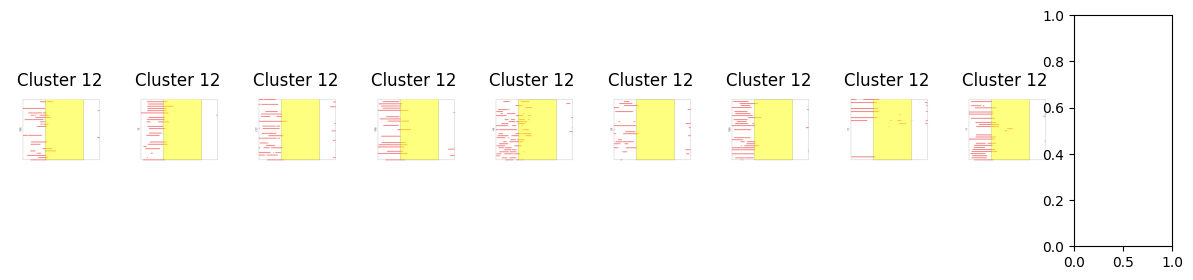

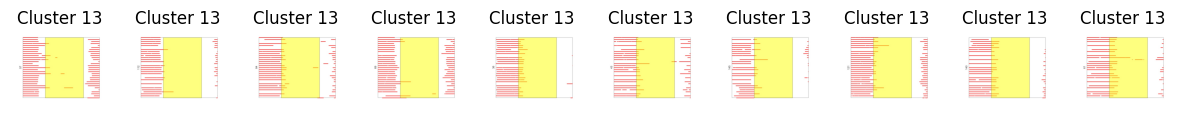

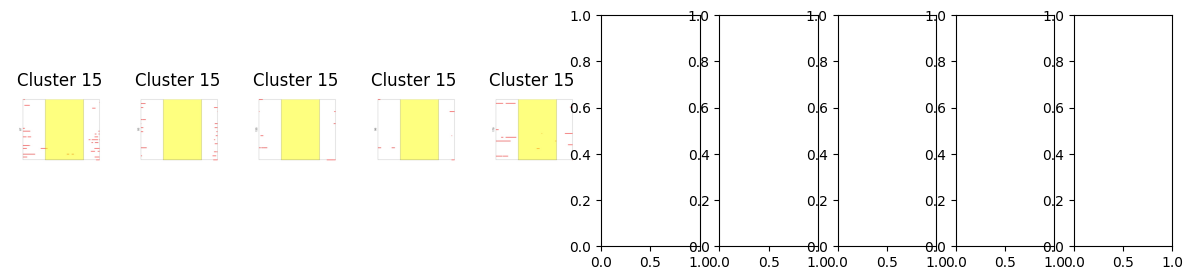

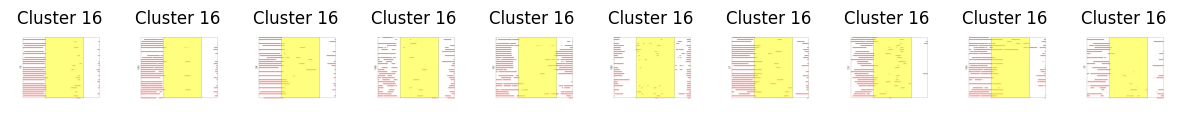

In [ ]:
import matplotlib.pyplot as plt
for i in range(n_clusters):
    show_images_from_cluster(i)

### finding optimal cluster sizes based on different metrics

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def optimize_kmeans(image_data, k_range):
    inertias = []
    silhouette_scores = []
    avg_distances = []

    for k in k_range:
        print(f"Processing k={k}")

        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(image_data)

        # Calculate inertia
        inertias.append(kmeans.inertia_)

        # Calculate silhouette score
        if k > 1:  # Silhouette Score is only valid for k > 1
            silhouette_avg = silhouette_score(image_data, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(0)

        # Calculate average pairwise distance within clusters
        avg_dist = []
        for i in range(k):
            cluster_points = image_data[kmeans.labels_ == i]
            if len(cluster_points) > 1:
                distances = np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2)
                avg_dist.append(np.mean(distances[distances > 0]))
        avg_distances.append(np.mean(avg_dist))

    return inertias, silhouette_scores, avg_distances

# Define the range of k to test
k_range = range(2, 21)  # Test from 2 to 20 clusters

# Run the optimization
inertias, silhouette_scores, avg_distances = optimize_kmeans(image_data, k_range)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')

ax3.plot(k_range, avg_distances, 'go-')
ax3.set_xlabel('Number of clusters (k)')
ax3.set_ylabel('Average Pairwise Distance')
ax3.set_title('Average Pairwise Distance within Clusters')

plt.tight_layout()
plt.show()

# Print the optimal k based on each metric
optimal_k_inertia = k_range[np.argmin(np.gradient(inertias))]
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_distance = k_range[np.argmin(avg_distances)]

print(f"Optimal k based on Elbow Method: {optimal_k_inertia}")
print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal k based on Average Pairwise Distance: {optimal_k_distance}")

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


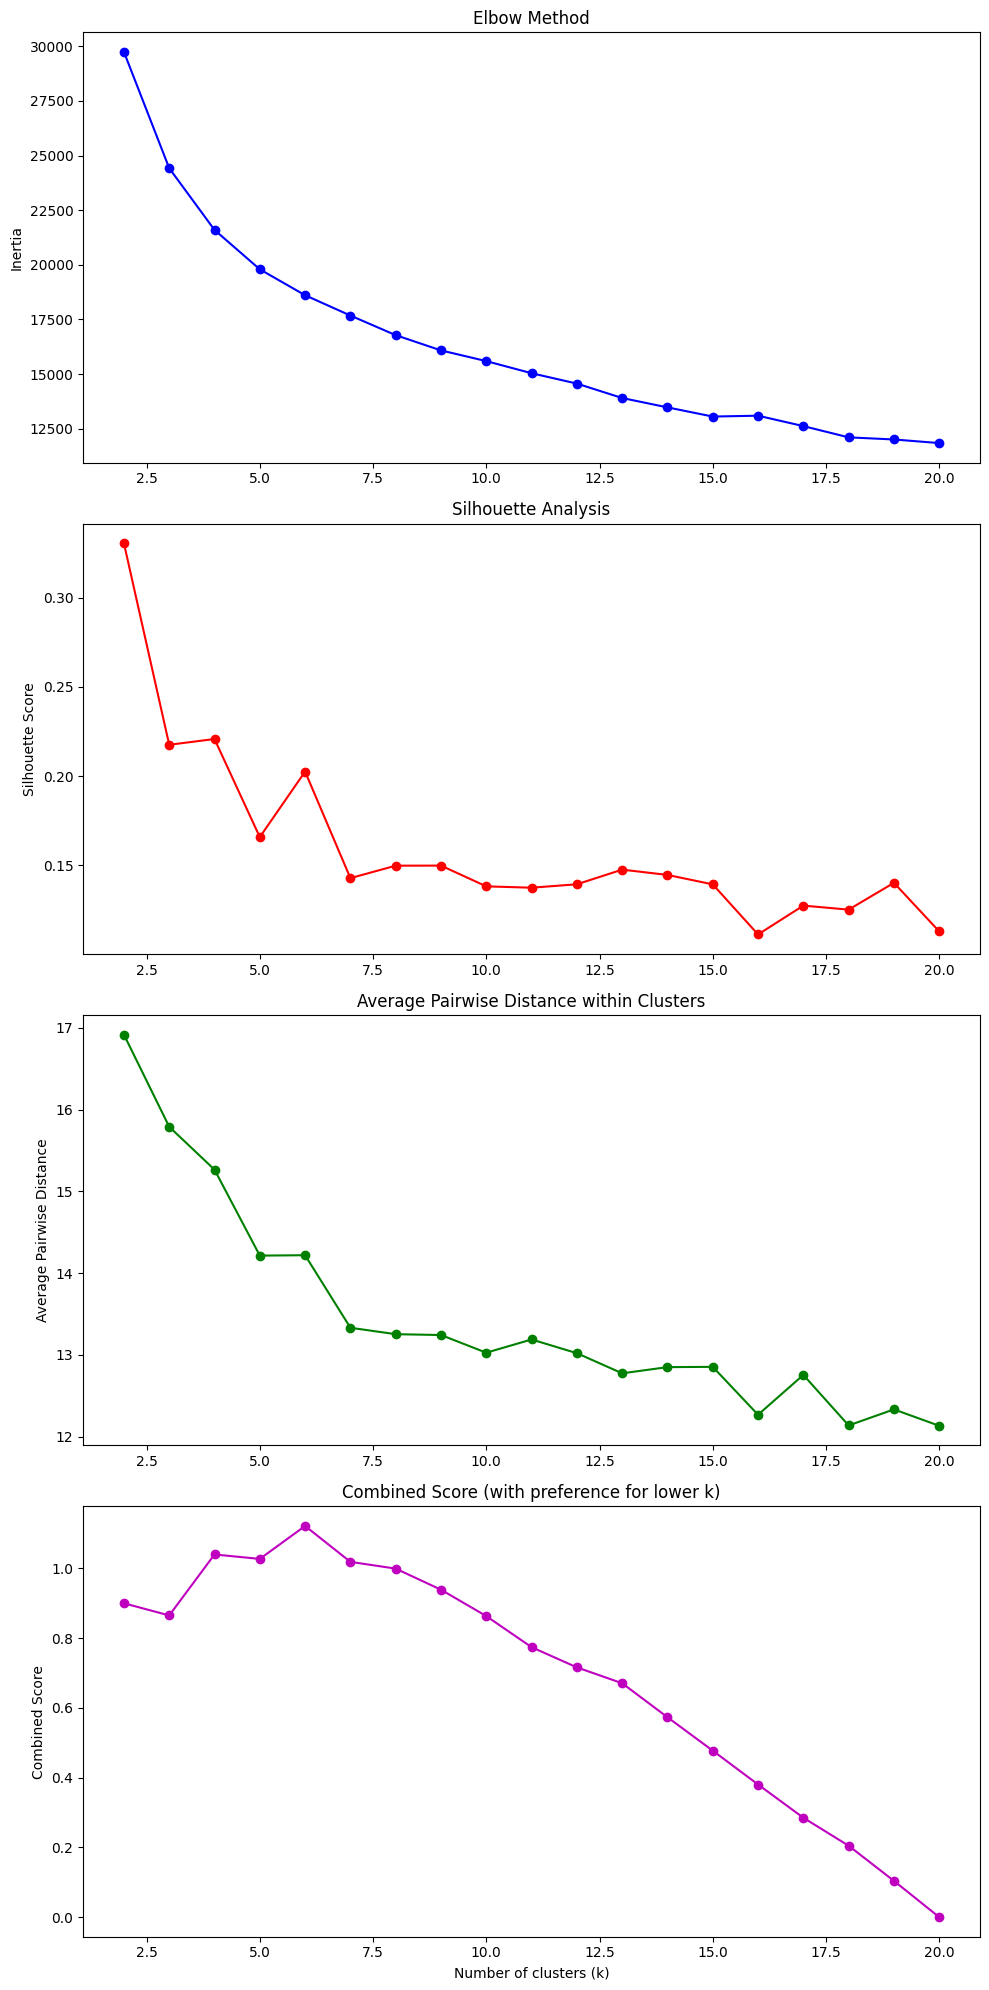

Optimal k balancing all factors: 6
For k=6:
Inertia: 18608.716796875
Silhouette Score: 0.2024914026260376
Average Pairwise Distance: 14.21966552734375
Combined Score: 1.1216076650585338


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def optimize_kmeans(image_data, k_range):
    inertias = []
    silhouette_scores = []
    avg_distances = []

    for k in k_range:
        print(f"Processing k={k}")

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(image_data)

        inertias.append(kmeans.inertia_)

        if k > 1:
            silhouette_avg = silhouette_score(image_data, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(0)

        avg_dist = []
        for i in range(k):
            cluster_points = image_data[kmeans.labels_ == i]
            if len(cluster_points) > 1:
                distances = np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2)
                avg_dist.append(np.mean(distances[distances > 0]))
        avg_distances.append(np.mean(avg_dist))

    return inertias, silhouette_scores, avg_distances

def calculate_combined_score(k, inertia, silhouette, avg_distance, max_k):
    # Normalize each metric
    norm_inertia = (max(inertias) - inertia) / (max(inertias) - min(inertias))
    norm_silhouette = (silhouette - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
    norm_avg_distance = (max(avg_distances) - avg_distance) / (max(avg_distances) - min(avg_distances))

    # Calculate combined score with a penalty for higher k
    k_penalty = 1 - (k / max_k)
    combined_score = (norm_inertia + norm_silhouette + norm_avg_distance) * k_penalty

    return combined_score

# Define the range of k to test
k_range = range(2, 21)  # Test from 2 to 20 clusters

# Run the optimization
inertias, silhouette_scores, avg_distances = optimize_kmeans(image_data, k_range)

# Calculate combined scores
combined_scores = [calculate_combined_score(k, i, s, d, max(k_range))
                   for k, i, s, d in zip(k_range, inertias, silhouette_scores, avg_distances)]

# Find the optimal k
optimal_k = k_range[np.argmax(combined_scores)]

# Plot the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')

ax3.plot(k_range, avg_distances, 'go-')
ax3.set_ylabel('Average Pairwise Distance')
ax3.set_title('Average Pairwise Distance within Clusters')

ax4.plot(k_range, combined_scores, 'mo-')
ax4.set_xlabel('Number of clusters (k)')
ax4.set_ylabel('Combined Score')
ax4.set_title('Combined Score (with preference for lower k)')

plt.tight_layout()
plt.show()

print(f"Optimal k balancing all factors: {optimal_k}")

# Print detailed results for the optimal k
print(f"For k={optimal_k}:")
print(f"Inertia: {inertias[optimal_k-2]}")
print(f"Silhouette Score: {silhouette_scores[optimal_k-2]}")
print(f"Average Pairwise Distance: {avg_distances[optimal_k-2]}")
print(f"Combined Score: {combined_scores[optimal_k-2]}")

#Best k-cluster size balancing all metrics: k = 6